Online Shopping Customer Segmentation
 customer Segmentation (clustering) on the basis of their buying patter (Recency,Frequency,Monetary)



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_excel("Online_shopping.xlsx")

In [4]:
df=data.copy()
df.head()

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   lower        1816 non-null    object        
 3   Description  540455 non-null  object        
 4   Quantity     541909 non-null  int64         
 5   InvoiceDate  541909 non-null  datetime64[ns]
 6   UnitPrice    541909 non-null  float64       
 7   CustomerID   406829 non-null  float64       
 8   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 37.2+ MB


In [6]:
# to solve the first problem --- clustering on basis of R F M
# we drop the unwanted columns

In [7]:
df1=df.drop(["StockCode","lower","Description","Country"],axis=1)

In [8]:
df1.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,6,2010-12-01 08:26:00,3.39,17850.0


In [9]:
df1.isnull().sum()

InvoiceNo           0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
dtype: int64

In [10]:
# as we are working on customer clustering  we can not impute customer id , if it is not there.

In [11]:
df1.dropna(axis=0,inplace=True)

In [12]:
df1.isnull().sum()

InvoiceNo      0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
dtype: int64

In [13]:
df1.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [14]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,406829.0,12.061303,248.693370,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,406829.0,3.460471,69.315162,0.0,1.25,1.95,3.75,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.0,13953.00,15152.00,16791.00,18287.0


In [15]:
# The quantity is -ve bcoz of return or defective item
# Unit price can be zero becoz of some offer

In [16]:
df1[df1["UnitPrice"]==0]["UnitPrice"].count()

40

In [17]:
df1[df1["UnitPrice"]==0].head(20)

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
9302,537197,1,2010-12-05 14:02:00,0.0,12647.0
33576,539263,4,2010-12-16 14:36:00,0.0,16560.0
40089,539722,10,2010-12-21 13:45:00,0.0,14911.0
47068,540372,24,2011-01-06 16:41:00,0.0,13081.0
47070,540372,24,2011-01-06 16:41:00,0.0,13081.0
56674,541109,1,2011-01-13 15:10:00,0.0,15107.0
86789,543599,16,2011-02-10 13:08:00,0.0,17560.0
130188,547417,36,2011-03-23 10:25:00,0.0,13239.0
139453,548318,5,2011-03-30 12:45:00,0.0,13113.0
145208,548871,2,2011-04-04 14:42:00,0.0,14410.0


In [18]:
# we want to continue with only those observation having +ve quantity

In [19]:
df1=df1[df1["Quantity"]>0]

In [20]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,397924.0,13.021823,180.420210,1.0,2.00,6.00,12.00,80995.00
UnitPrice,397924.0,3.116174,22.096788,0.0,1.25,1.95,3.75,8142.75
CustomerID,397924.0,15294.315171,1713.169877,12346.0,13969.00,15159.00,16795.00,18287.00


In [21]:
df1.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,6,2010-12-01 08:26:00,3.39,17850.0


In [22]:
df1["Total"]=df1["Quantity"]*df1["UnitPrice"]

In [23]:
df1.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,15.30
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,22.00
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34


In [24]:
# drop the column Quantity  Unit price

In [25]:
df2=df1.drop(["Quantity","UnitPrice"],axis=1)

In [26]:
df2.head(100)

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,15.30
1,536365,2010-12-01 08:26:00,17850.0,20.34
2,536365,2010-12-01 08:26:00,17850.0,22.00
3,536365,2010-12-01 08:26:00,17850.0,20.34
4,536365,2010-12-01 08:26:00,17850.0,20.34
...,...,...,...,...
95,536378,2010-12-01 09:37:00,14688.0,15.30
96,536378,2010-12-01 09:37:00,14688.0,50.40
97,536378,2010-12-01 09:37:00,14688.0,13.20
98,536378,2010-12-01 09:37:00,14688.0,13.20


In [27]:
# groupby approach - to generate the final invoice

In [28]:
df_final=df2.groupby(["InvoiceNo","InvoiceDate","CustomerID"]).agg({"Total":"sum"}).reset_index()

In [29]:
df_final

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85
...,...,...,...,...
18561,581583,2011-12-09 12:23:00,13777.0,124.60
18562,581584,2011-12-09 12:25:00,13777.0,140.64
18563,581585,2011-12-09 12:31:00,15804.0,329.05
18564,581586,2011-12-09 12:49:00,13113.0,339.20


#### now we want to calculate Recency, Frequency,Monetary
Recency=(last business date as per record)- last purchse date(of a particular customer)
Frequency= counting of different  invoice no. w.r.to a particular customer
Monetary=Summation of Total w.r.to a particular customer

In [ ]:
# we will use groupby -- keeping customer_id as reference

In [ ]:
# calcualte the last business date as per dataset

In [31]:
max(df_final["InvoiceDate"])

Timestamp('2011-12-09 12:50:00')

In [32]:
min(df_final["InvoiceDate"])

Timestamp('2010-12-01 08:26:00')

In [33]:
#last business date as per dataset=2011-12-09 12:50:00
# we have 12 month of data(approx)

In [34]:
# basically we want the recency in days -- not in hour, minutes etc

latest_data or last date of business-- if we add 1 day extra the recency will be only in days . 
not in hour or minutes

In [35]:
import datetime as dt
latest_date=dt.datetime(2011,12,10)
latest_date

datetime.datetime(2011, 12, 10, 0, 0)

In [36]:
df_final.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85


In [37]:
# we will use groupby -- keeping customer_id as reference

In [38]:
RFM_score=df_final.groupby("CustomerID").agg({"InvoiceDate":lambda x:(latest_date-x.max()).days,
                                             "InvoiceNo":lambda x:x.count(),
                                             "Total":lambda x:x.sum()}).reset_index()

In [39]:
RFM_score.head()

,CustomerID,InvoiceDate,InvoiceNo,Total
0,12346.0,325,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40


In [40]:
# lets rename it as per the actual calculation 

In [41]:
RFM_score=RFM_score.rename(columns={"InvoiceDate":"Recency","InvoiceNo":"Frequency","Total":"Monetary"})

In [42]:
RFM_score.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40


In [43]:
RFM_score.shape

(4339, 4)

In [44]:
# lest find the marks on the basis of ranking in individual R F M

In [45]:
RFM_score["R_marks"]=RFM_score["Recency"].rank(ascending=False)
RFM_score["R_marks"]

0        162.5
1       4156.5
2       1646.0
3       3209.5
4        227.5
         ...  
4334     355.0
4335     860.0
4336    3839.5
4337    4064.5
4338    2357.0
Name: R_marks, Length: 4339, dtype: float64

In [46]:
# Frequency marks with respect to rank

In [47]:
RFM_score["F_marks"]=RFM_score["Frequency"].rank(ascending=True)
RFM_score["F_marks"]

0        746.5
1       3709.5
2       3028.0
3        746.5
4        746.5
         ...  
4334     746.5
4335     746.5
4336    1910.5
4337    4182.5
4338    2581.5
Name: F_marks, Length: 4339, dtype: float64

In [48]:
# Monetary marks with respect to rank

In [49]:
RFM_score["M_marks"]=RFM_score["Monetary"].rank(ascending=True)
RFM_score["M_marks"]

0       4330.0
1       4004.0
2       3334.0
3       3306.0
4       1230.0
         ...  
4334     564.0
4335     105.0
4336     547.0
4337    3489.0
4338    3357.0
Name: M_marks, Length: 4339, dtype: float64

In [50]:
RFM=RFM_score.copy()

In [51]:
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R_marks,F_marks,M_marks
0,12346.0,325,1,77183.60,162.5,746.5,4330.0
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0
4,12350.0,310,1,334.40,227.5,746.5,1230.0


In [52]:
# lets convert the marks with respect to 100 marks

In [53]:
RFM["R_final"]=(RFM["R_marks"]/RFM["R_marks"].max())*100

In [54]:
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R_marks,F_marks,M_marks,R_final
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,3.759833
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,96.170754
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,38.084220
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,74.259602
4,12350.0,310,1,334.40,227.5,746.5,1230.0,5.263767


In [55]:
RFM["F_final"]=(RFM["F_marks"]/RFM["F_marks"].max())*100

In [56]:
RFM["M_final"]=(RFM["M_marks"]/RFM["M_marks"].max())*100

In [57]:
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R_marks,F_marks,M_marks,R_final,F_final,M_final
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,3.759833,17.204425,99.792579
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,96.170754,85.492049,92.279327
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,38.084220,69.785665,76.837981
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,74.259602,17.204425,76.192671
4,12350.0,310,1,334.40,227.5,746.5,1230.0,5.263767,17.204425,28.347546


In [58]:
RFM["RFM_final"]=0.30*RFM["R_final"]+0.30*RFM["F_final"]+0.50*RFM["M_final"]

In [59]:
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R_marks,F_marks,M_marks,R_final,F_final,M_final,RFM_final
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,3.759833,17.204425,99.792579,56.185567
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,96.170754,85.492049,92.279327,100.638504
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,38.084220,69.785665,76.837981,70.779956
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,74.259602,17.204425,76.192671,65.535544
4,12350.0,310,1,334.40,227.5,746.5,1230.0,5.263767,17.204425,28.347546,20.914230


In [60]:
RFM=RFM.round(2)
RFM.head(2)

,CustomerID,Recency,Frequency,Monetary,R_marks,F_marks,M_marks,R_final,F_final,M_final,RFM_final
0,12346.0,325,1,77183.6,162.5,746.5,4330.0,3.76,17.20,99.79,56.19
1,12347.0,2,7,4310.0,4156.5,3709.5,4004.0,96.17,85.49,92.28,100.64


In [61]:
# lets we want to create four groups 

In [62]:
Loyality_label=["Silver","Gold","Diamond","Platinum"]

In [63]:
Quantile=RFM["RFM_final"].quantile(q=[0.25,0.50,0.75])

In [64]:
Quantile

0.25    31.50
0.50    53.75
0.75    77.75
Name: RFM_final, dtype: float64

In [65]:
# lets visualize the percentile to decide the quantile

In [66]:
# ecdf--:- emperical cummulative distribution function plot

<Axes: xlabel='RFM_final', ylabel='Proportion'>

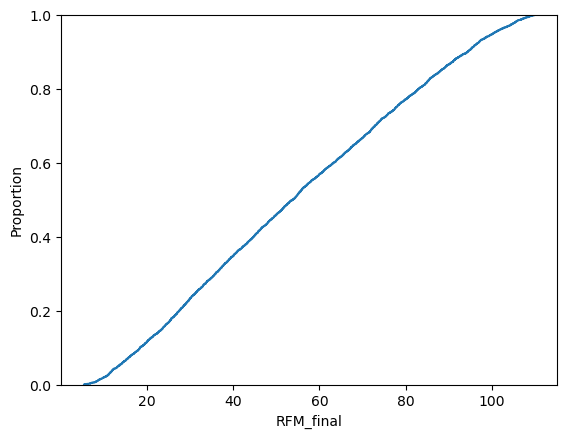

In [67]:
sns.ecdfplot(data=RFM["RFM_final"])

In [68]:
# write a function to assign the customer in different group as per their marks and quantile approach

In [69]:
def loyality(x):
    if x<=31:
        return "Silver"
    elif x<=54:
        return "Gold"
    elif x<=78:
        return "Diamond"
    else:
        return "Platinum"
    

In [70]:
RFM["Loyality"]=RFM["RFM_final"].apply(loyality)

In [71]:
RFM.head(20)

,CustomerID,Recency,Frequency,Monetary,R_marks,F_marks,M_marks,R_final,F_final,M_final,RFM_final,Loyality
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,3.76,17.20,99.79,56.19,Diamond
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,96.17,85.49,92.28,100.64,Platinum
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,38.08,69.79,76.84,70.78,Diamond
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,74.26,17.20,76.19,65.54,Diamond
4,12350.0,310,1,334.40,227.5,746.5,1230.0,5.26,17.20,28.35,20.91,Silver
5,12352.0,36,8,2506.04,2502.5,3828.0,3638.0,57.90,88.22,83.84,85.76,Platinum
6,12353.0,204,1,89.00,725.5,746.5,117.0,16.79,17.20,2.70,11.55,Silver
7,12354.0,232,1,1079.40,602.5,746.5,2780.0,13.94,17.20,64.07,41.38,Gold
8,12355.0,214,1,459.40,672.5,746.5,1660.0,15.56,17.20,38.26,28.96,Silver
9,12356.0,22,3,2811.43,3037.5,2581.5,3739.0,70.28,59.50,86.17,82.02,Platinum


In [72]:
RFM["Loyality"].value_counts()

Gold        1120
Diamond     1088
Platinum    1073
Silver      1058
Name: Loyality, dtype: int64

In [73]:
# we can do the cutomer segmentation with Kmeans clustering algorithm

In [74]:
Newdata=RFM["RFM_final"]
Newdata

0        56.19
1       100.64
2        70.78
3        65.54
4        20.91
         ...  
4334     14.12
4335     12.34
4336     46.16
4337     97.34
4338     72.89
Name: RFM_final, Length: 4339, dtype: float64

In [75]:
Newdata=pd.DataFrame(Newdata)
Newdata

,RFM_final
0,56.19
1,100.64
2,70.78
3,65.54
4,20.91
...,...
4334,14.12
4335,12.34
4336,46.16
4337,97.34


In [76]:
from sklearn.cluster import KMeans

In [77]:
kmeans1=KMeans(n_clusters=4,max_iter=100,random_state=100)
y_kmeans=kmeans1.fit_predict(Newdata)
y_kmeans

array([2, 0, 3, ..., 2, 0, 3])

In [78]:
RFM["Cluster"]=kmeans1.labels_

In [79]:
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R_marks,F_marks,M_marks,R_final,F_final,M_final,RFM_final,Loyality,Cluster
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,3.76,17.20,99.79,56.19,Diamond,2
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,96.17,85.49,92.28,100.64,Platinum,0
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,38.08,69.79,76.84,70.78,Diamond,3
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,74.26,17.20,76.19,65.54,Diamond,3
4,12350.0,310,1,334.40,227.5,746.5,1230.0,5.26,17.20,28.35,20.91,Silver,1


In [80]:
RFM["Cluster"].value_counts()

1    1214
2    1179
3    1034
0     912
Name: Cluster, dtype: int64

In [81]:
RFM["Loyality"].value_counts()

Gold        1120
Diamond     1088
Platinum    1073
Silver      1058
Name: Loyality, dtype: int64

In [82]:
# how to find the best no. of cluster --- elbow method -- SSE error calculate

In [83]:
# calculate the silhouette_score

Text(0, 0.5, 'Sum of square error')

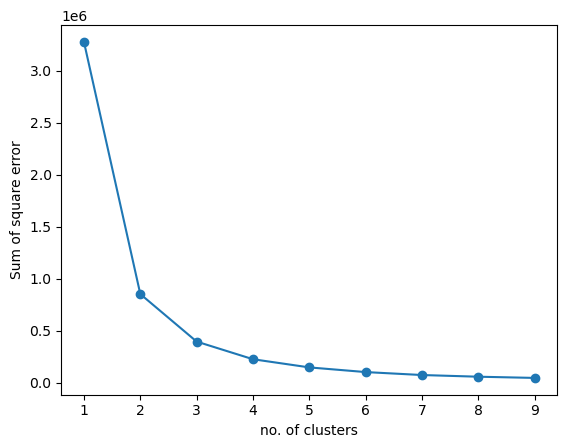

In [84]:
SSE=[]
for i in range(1,10):
    kmeans1=KMeans(max_iter=100,random_state=100,n_clusters=i)
    kmeans1.fit_predict(Newdata)
    SSE.append(kmeans1.inertia_)
    
plt.plot(range(1,10),SSE,marker="o")
plt.xlabel("no. of clusters")
plt.ylabel("Sum of square error")

In [ ]:
#pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
model=kmenas1
visualizer=KElbowVisualizer(model,k=(1,10)).fit(Newdata)
visualizer.show()

In [ ]:
#evaluation of clustering

In [85]:
from sklearn.metrics import silhouette_score

In [86]:
labels=kmeans1.labels_


In [87]:
silhouette_score(Newdata,labels)

0.534438697793558